In [1]:
import numpy as np

import networkx as nx
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

from scipy.linalg import sqrtm
from scipy.special import softmax

import matplotlib.pyplot as plt
from matplotlib import animation


In [2]:
graph = nx.karate_club_graph()

In [3]:
print(graph.number_of_nodes())
print(graph.number_of_edges())

34
78


In [4]:
communities = greedy_modularity_communities(graph)

In [17]:
def viz_graph(graph, label_map, node_color, pos = None, **kwargs):
    fig, ax = plt.subplots(figsize = (10, 10))
    if pos is None:
        pos = nx.spring_layout(graph, k = 5/np.sqrt(graph.number_of_nodes()))
    
    nx.draw(graph, pos, with_labels = label_map is not None, labels = label_map, node_color = node_color, ax = ax, **kwargs)

    #plt.savefig('graph.png', bbox_inches = 'tight')


In [6]:
colors = np.zeros(graph.number_of_nodes())
for index, com in enumerate(communities):
    colors[list(com)] = index

classes = np.unique(colors).shape[0]
labels = np.eye(classes)[colors.astype(int)]

In [7]:
club_labels = nx.get_node_attributes(graph, 'club')

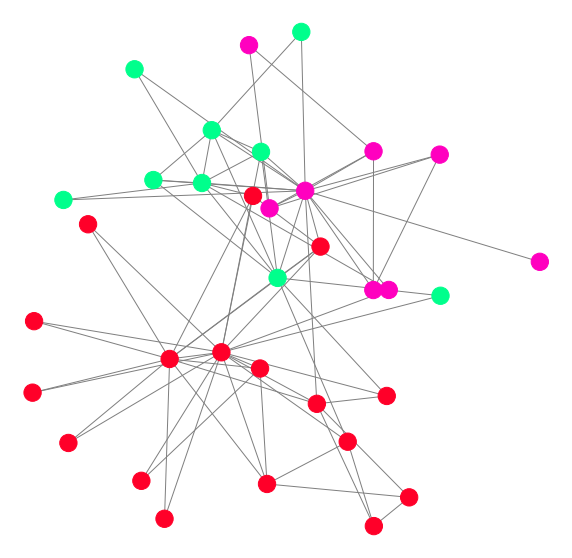

In [18]:
viz = viz_graph(graph, None, colors, cmap = 'gist_rainbow', edge_color = 'gray')